# CHAPTER 8: **Data Analysis and Visualization Mini Project**

# Unit 39: **Financial Data Analysis Mini Project**


To be adequately prepared for the majority of data types in real-world work, one must regularly acquire and process financial data from a variety of factors that have accumulated over time.

# Step 1 Prepare data acquisition and create data acquisition functions

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

In [2]:
def get_stock_data(ticker,start,end):
  data = web.DataReader(ticker,'yahoo',start,end)
  data.insert(0, "Ticker", ticker)
  return data

In [3]:
ticker = "DIS"
start = datetime(2023,1,1)
end = datetime.today()


Yahoo finance has changed the structure of its website and as a result, packages for retrieving data have stopped functioning properly.

In [4]:
# d = get_stock_data(ticker,start,end)
# d.head()

In [5]:
d = pd.read_csv("DIS.csv")
d.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    02/02/2022  144.190002  144.589996  141.380005  142.619995  142.619995   
1    03/02/2022  140.000000  142.039993  139.250000  140.029999  140.029999   
2    04/02/2022  140.039993  143.190002  139.529999  142.020004  142.020004   
3    07/02/2022  143.389999  144.089996  141.610001  142.509995  142.509995   
4    08/02/2022  141.789993  142.889999  140.740005  142.479996  142.479996   
..          ...         ...         ...         ...         ...         ...   
246  26/01/2023  108.169998  109.760002  107.570000  109.699997  109.699997   
247  27/01/2023  109.260002  110.580002  109.160004  109.540001  109.540001   
248  30/01/2023  108.260002  108.970001  107.480003  107.589996  107.589996   
249  31/01/2023  107.580002  108.720001  107.449997  108.489998  108.489998   
250  01/02/2023  108.500000  109.940002  106.900002  109.389999  109.389999   

       Volume Ticker 

In [6]:
d = d.pivot(index=None, columns='Ticker', values='Close' )
d.head()

Ticker,DIS
0,142.619995
1,140.029999
2,142.020004
3,142.509995
4,142.479996


# Step 2
• Create a data frame required for analysis using the created function.

• The name of the data frame is the name of each ticker: SPY / IYW / VT / DBA / TLT / PDBC / IAU

In [7]:
# SPY = get_stock_data("SPY" ,start,end)
# IYW = get_stock_data("IYW",start,end)
# VT = get_stock_data("VT" , start,end)
# DBA = get_stock_data("DBA", start,end)
# TLT=get_stock_data("TLT" , start, end)
# PDBC = get_stock_data("PDBC",start,end)
# IAU = get_stock_data("IAU",start,end)

In [48]:
SPY = pd.read_csv('SPY.csv', parse_dates=['Date'])
IYW = pd.read_csv("IYW.csv",parse_dates=['Date'])

In [49]:
SPY.info()
IYW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   Low        504 non-null    float64       
 4   Close      504 non-null    float64       
 5   Adj Close  504 non-null    float64       
 6   Volume     504 non-null    int64         
 7   Ticker     504 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 31.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   

In [50]:
#Execute pivoting per data frame
SPY= SPY.pivot(index="Date", columns=["Ticker"], values="Close")
IYW= IYW.pivot(index="Date",columns=["Ticker"], values="Close")

# VT=VT.pivot(index=None, columns="Ticker",values="Close")
# DBA=DBA.pivot(index=None, columns="Ticker",values = "Close")
# TLT=TLT.pivot(index=None, columns="Ticker", values="Close")
# PDBC=PDBC.pivot(index=None,columns="Ticker", values="Close")
# IAU=IAU.pivot(index=None,columns="Ticker", values="Close")


• Each created data frame is combined into one data frame for efficient analysis.

In [51]:
stock=pd.concat([SPY,IYW],
        axis=1,
        join='outer')
stock.head()

Ticker,SPY,IYW
Date,,
2020-01-04,246.149994,48.730000
2020-01-05,282.790009,56.887501
2020-01-06,305.549988,63.257500
2020-01-07,310.519989,67.709999
2020-01-09,352.600006,81.599998


In [12]:
# stock=pd.concat([SPY , IYW, VT , DBA, TLT , PBC, IAU] ,
#         axis=1,
#         join='outer')
# stock.head()

# Step 3
• If you draw a graph based on the closing price data on a time series basis (date), you can check the stock price
movement. By overlapping the graphs of each ticker, you can see the approximate correlation.

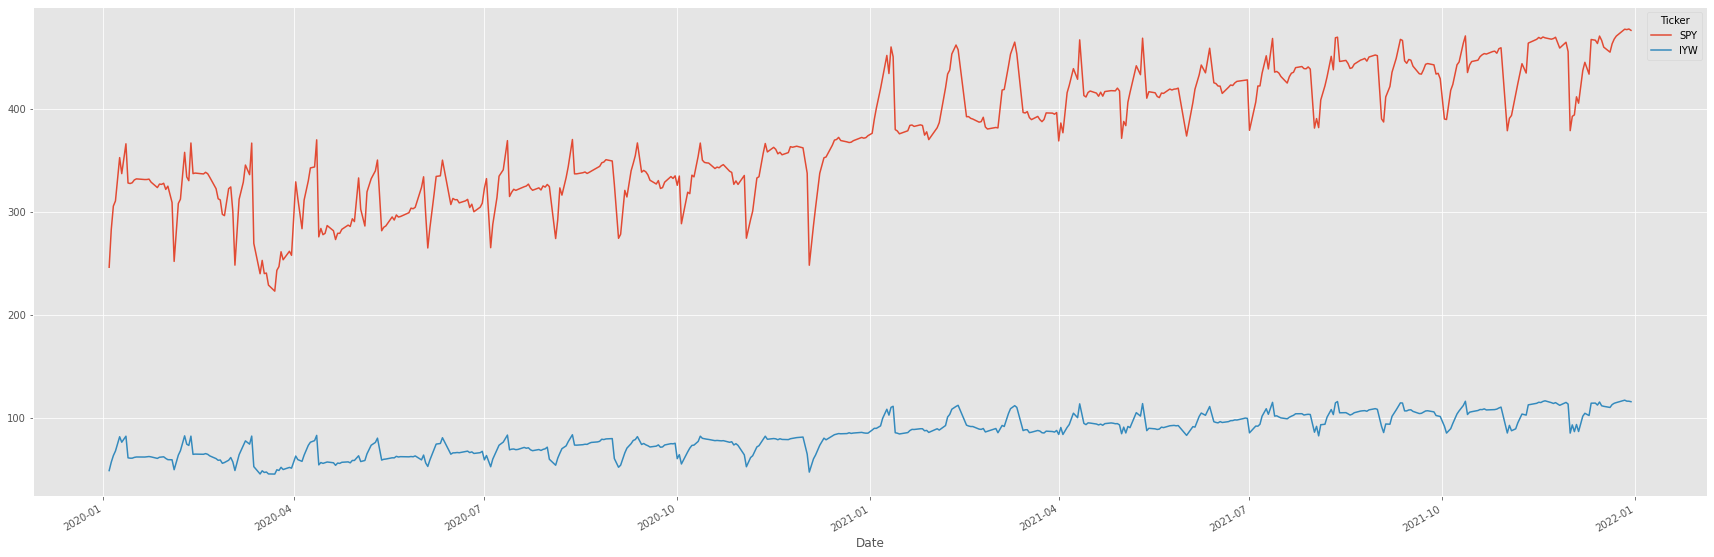

In [54]:
plt.style.use('ggplot')
stock.plot(figsize = (30, 10))
plt.show()

• If you see the graph above, there is a section with serious price fluctuations. This is the period when Corona started.
Let's check the data by slicing using the time series data index only for this period.

In [55]:
covid = stock['2020-2-1':'2020-7-31']

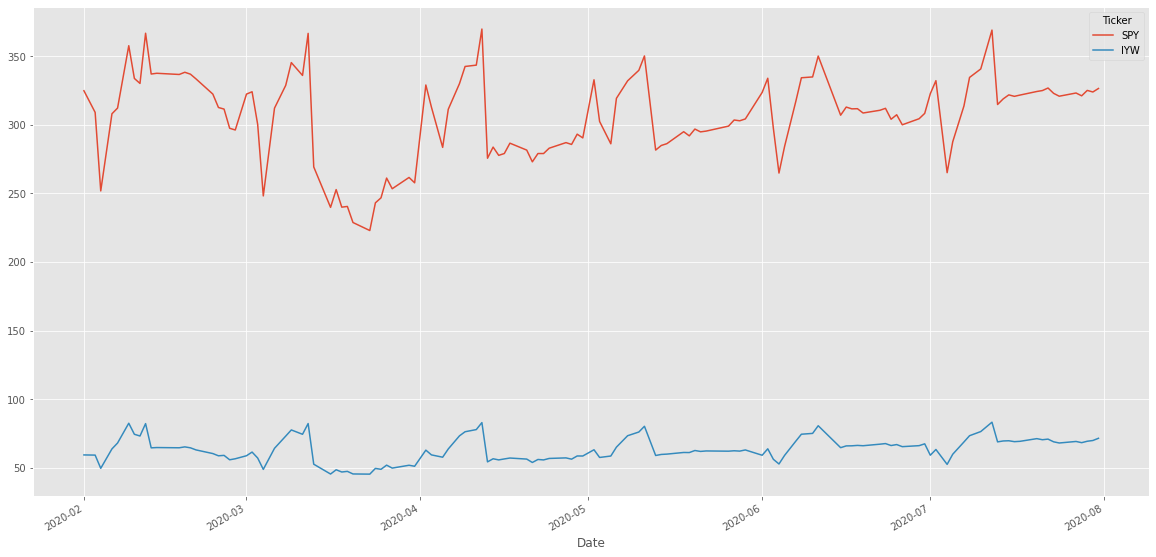

In [56]:
plt.style.use('ggplot')
covid.plot(figsize =(20, 10))
plt.show()

In [66]:
x=covid.index
s_y = covid[['SPY']]
i_y = covid[['IYW']]


• Let's compare how assets with different personalities react during times of great shock to economic conditions like the coronavirus.

**subplots**


Text(0.5, 0.98, 'Covid 19')

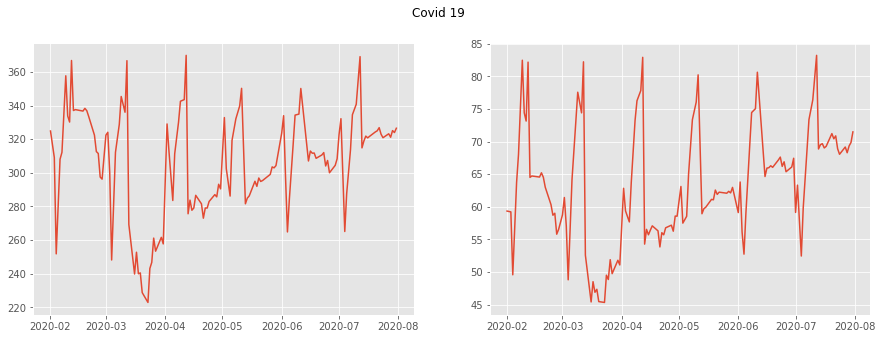

In [68]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
fig.suptitle('Covid 19')


# Step 4
• Let's visualize the trading volume data in the form of a bar graph for a specific ticker.

In [73]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

In [75]:
def get_stock_data(ticker,start,end):
  data = web.DataReader(ticker, 'yahoo',start,end)
  data.insert(0,"Ticker",ticker)
  return data

In [79]:
ticker = 'DIS'
start = datetime(2020,1,1)
end = datetime.today()

In [95]:
# df = get_stock_data(ticker,start,end) 
df = pd.read_csv('DIS.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-02-02,144.190002,144.589996,141.380005,142.619995,142.619995,9529900,DIS
1,2022-03-02,140.000000,142.039993,139.250000,140.029999,140.029999,9820600,DIS
2,2022-04-02,140.039993,143.190002,139.529999,142.020004,142.020004,8061100,DIS
3,2022-07-02,143.389999,144.089996,141.610001,142.509995,142.509995,10937500,DIS
4,2022-08-02,141.789993,142.889999,140.740005,142.479996,142.479996,9231700,DIS


In [96]:
#delete all except the volume column
df.drop(['Ticker','High' ,'Low' ,"Open" ,"Close","Adj Close"], axis=1, inplace=True)

In [97]:
df.head()

,Date,Volume
0,2022-02-02,9529900
1,2022-03-02,9820600
2,2022-04-02,8061100
3,2022-07-02,10937500
4,2022-08-02,9231700


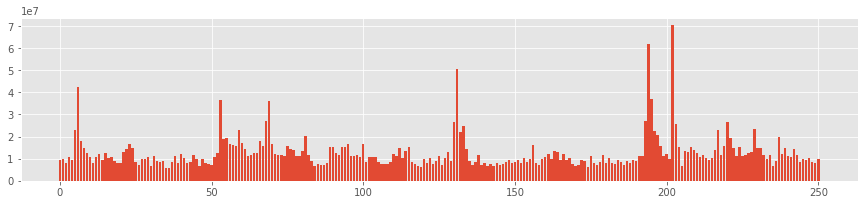

In [113]:
import matplotlib.pyplot as plt

x = df.index
y = df['Volume']
plt.figure(figsize=(15,3))
plt.bar(x,y)
plt.show()

# Step 5
• Using matplotlib's subplot2grid, the graph of the closing price is visualized in the upper layout and the trading volume in the same period is visualized in the lower layout.

In [116]:
ticker = 'SPY'
start = datetime(2020,1,1)
end = datetime(2021,1,1)

In [117]:
df = pd.read_csv('DIS.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-02-02,144.190002,144.589996,141.380005,142.619995,142.619995,9529900,DIS
1,2022-03-02,140.000000,142.039993,139.250000,140.029999,140.029999,9820600,DIS
2,2022-04-02,140.039993,143.190002,139.529999,142.020004,142.020004,8061100,DIS
3,2022-07-02,143.389999,144.089996,141.610001,142.509995,142.509995,10937500,DIS
4,2022-08-02,141.789993,142.889999,140.740005,142.479996,142.479996,9231700,DIS


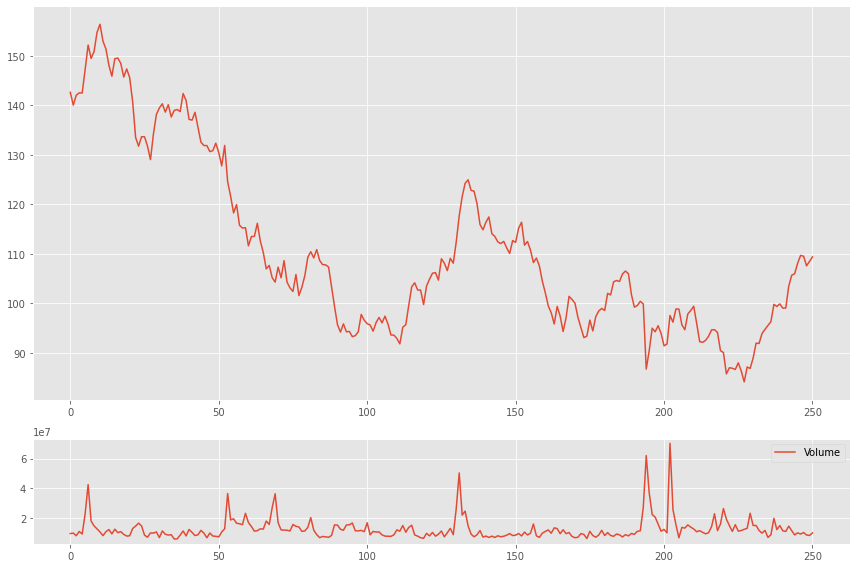

In [121]:
fig = plt.figure(figsize=(12, 8))

top_grid = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_grid = plt.subplot2grid((4,4),(3, 0), rowspan=1, colspan=4)

top_grid.plot (df.index, df['Close'], label='Close')
bottom_grid.plot(df.index, df['Volume'], label='Volume')

plt.tight_layout()
plt.legend()
plt.show()

# Step 6
• We will use the pandas.Series.shift() method to calculate the daily percentage change.

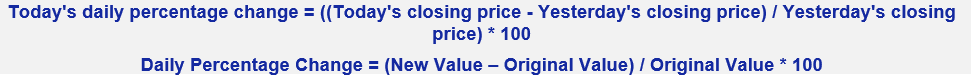

In [122]:
stock.head()

Ticker,SPY,IYW
Date,,
2020-01-04,246.149994,48.730000
2020-01-05,282.790009,56.887501
2020-01-06,305.549988,63.257500
2020-01-07,310.519989,67.709999
2020-01-09,352.600006,81.599998


In [123]:
stock['SPY']

Date
2020-01-04    246.149994
2020-01-05    282.790009
2020-01-06    305.549988
2020-01-07    310.519989
2020-01-09    352.600006
                 ...    
2021-12-23    470.600006
2021-12-27    477.260010
2021-12-28    476.869995
2021-12-29    477.480011
2021-12-30    476.160004
Name: SPY, Length: 504, dtype: float64

In [124]:
stock['SPY'].shift(1)

Date
2020-01-04           NaN
2020-01-05    246.149994
2020-01-06    282.790009
2020-01-07    305.549988
2020-01-09    310.519989
                 ...    
2021-12-23    467.690002
2021-12-27    470.600006
2021-12-28    477.260010
2021-12-29    476.869995
2021-12-30    477.480011
Name: SPY, Length: 504, dtype: float64

• Shift one day to get the previous day's closing price.

In [127]:
spy_dayily_pc=(stock['SPY']/stock['SPY'].shift(1)-1)*100

In [128]:
spy_dayily_pc

Date
2020-01-04          NaN
2020-01-05    14.885239
2020-01-06     8.048367
2020-01-07     1.626575
2020-01-09    13.551468
                ...    
2021-12-23     0.622208
2021-12-27     1.415215
2021-12-28    -0.081720
2021-12-29     0.127921
2021-12-30    -0.276453
Name: SPY, Length: 504, dtype: float64

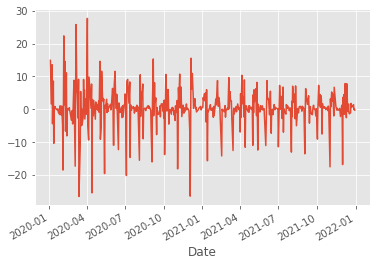

In [129]:
spy_dayily_pc.plot()

• A histogram is a graph showing the frequency distribution.

• It represents the frequency of data values by time.

• At this time, the number of sections is used by setting the parameter bins value of the hist() function.

In [131]:
spy_dayily_pc=(stock['SPY']-stock['SPY'].shift(1))/stock['SPY'].shift(1)*100

In [133]:
spy_dayily_pc.iloc[0]=0

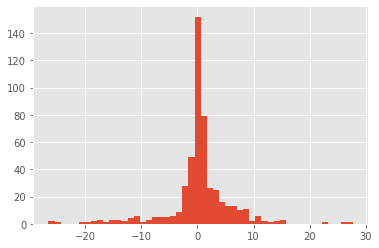

In [134]:
plt.hist(spy_dayily_pc, bins = 50)
plt.show()


# Step 7
• Let's create a new data frame that calculates daily stock price changes for all tickers, calculate daily cumulative returns, and analyze the correlation

In [135]:
stock_dayily_pc = (stock-stock.shift(1)/stock.shift(1))*100
stock_dayily_pc.head()

Ticker,SPY,IYW
Date,,
2020-01-04,NaN,NaN
2020-01-05,28179.0009,5588.7501
2020-01-06,30454.9988,6225.7500
2020-01-07,30951.9989,6670.9999
2020-01-09,35160.0006,8059.9998


• The formula for the simple daily cumulative return can be obtained by accumulating and multiplying the daily stock price change rate obtained above.
 We can use the .compsum() method.

In [136]:
stock_d_cr= stock_dayily_pc.cumsum()

In [137]:
stock_d_cr

Ticker,SPY,IYW
Date,,
2020-01-04,NaN,NaN
2020-01-05,2.817900e+04,5.588750e+03
2020-01-06,5.863400e+04,1.181450e+04
2020-01-07,8.958600e+04,1.848550e+04
2020-01-09,1.247460e+05,2.654550e+04
...,...,...
2021-12-23,1.855724e+07,4.105865e+06
2021-12-27,1.860487e+07,4.117474e+06
2021-12-28,1.865245e+07,4.128989e+06


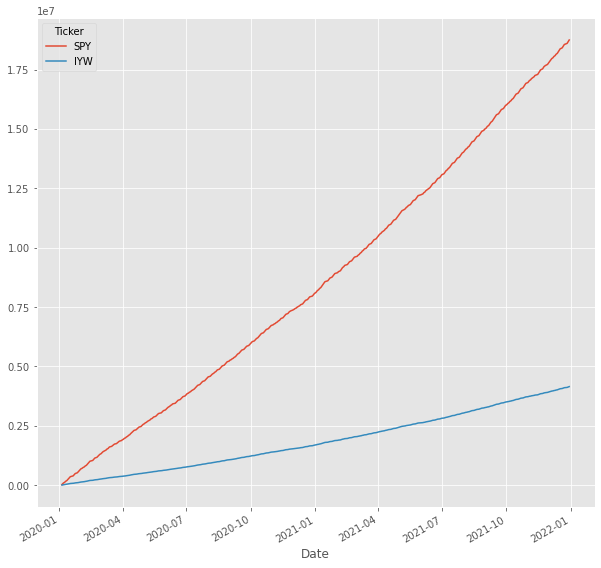

In [140]:
stock_d_cr.plot(figsize = (10, 10))

• The correlation coefficient refers to measuring the strength of the association between data as we learned earlier.The closer to 1.0, the stronger the relationship, and the closer to 0, the less the relationship. Let's analyze it using the learned .corr().

In [141]:
df_corr = stock_dayily_pc.corr()

In [142]:
df_corr

Ticker,SPY,IYW
Ticker,,
SPY,1.000000,0.983259
IYW,0.983259,1.000000


# Step 8
• Let's visualize it as a heatmap.

• The darker the color, the lower the correlation, and the brighter the color, the higher the correlation. Let's check how each economic factor correlates in the real economy.

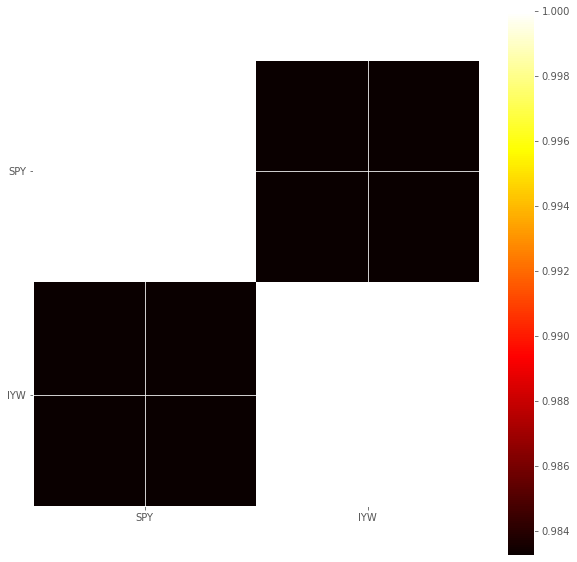

In [145]:
plt.imshow(df_corr, cmap ='hot', interpolation ='none' )
plt.colorbar()
plt.xticks(range(len(df_corr)),df_corr.columns)
plt.yticks(range(len(df_corr)),df_corr.columns)

plt.gcf().set_size_inches(10, 10)


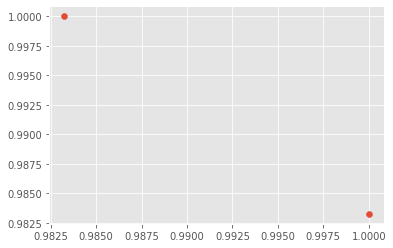

In [147]:
plt.scatter(df_corr.SPY, df_corr.IYW)
plt.show()

# Step 9
• Let's track the change in stock price over a specific period of time. This technique is usually used to determine the risk rate of the stock by comparing the volatility of the entire market index as reference data.

• The purpose is to measure the amount of change in a specific period and compare it with stable reference data to use it to determine the risk of the currently evaluated data.

In [149]:
periods = 75
vol = stock_dayily_pc.rolling(window=periods).std()
vol

Ticker,SPY,IYW
Date,,
2020-01-04,NaN,NaN
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2021-12-23,2459.825911,882.439956
2021-12-27,2489.679249,892.100184
2021-12-28,2504.104117,894.537750


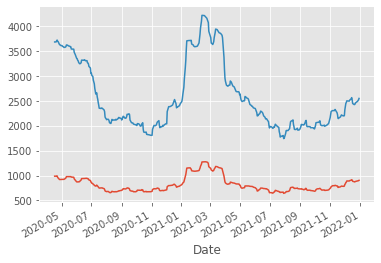

In [150]:
vol['IYW'].plot()
vol['SPY'].plot()

# Unit 40. Global Corona Pandemic Analysis Mini Project

* Data from the [Coronavirus (COVID-19) Vaccinations] database collected in real time by
https://ourworldindata.org/
* Data  "./data//covid/covid-vaccination-doses-per-capita.csv”.

# Step 1
Let's prepare the data

In [151]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import date, datetime, time, timezone

In [152]:
df = pd.read_csv("covid-vaccination-doses-per-capita.csv")
df.info

<bound method DataFrame.info of             Entity Code         Day  total_vaccinations_per_hundred
0      Afghanistan  AFG  2021-02-22                            0.00
1      Afghanistan  AFG  2021-02-28                            0.02
2      Afghanistan  AFG  2021-03-16                            0.13
3      Afghanistan  AFG  2021-04-07                            0.29
4      Afghanistan  AFG  2021-04-22                            0.58
...            ...  ...         ...                             ...
72398     Zimbabwe  ZWE  2022-10-01                           74.83
72399     Zimbabwe  ZWE  2022-10-02                           74.84
72400     Zimbabwe  ZWE  2022-10-03                           74.86
72401     Zimbabwe  ZWE  2022-10-05                           74.87
72402     Zimbabwe  ZWE  2022-10-09                           74.89

[72403 rows x 4 columns]>

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72403 entries, 0 to 72402
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          72403 non-null  object 
 1   Code                            60393 non-null  object 
 2   Day                             72403 non-null  object 
 3   total_vaccinations_per_hundred  72403 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


In [154]:
df['Date']=pd.to_datetime(df['Day'])
df.set_index('Date',inplace= True)
df.drop(['Day'], axis=1, inplace=True)
df.head()

,Entity,Code,total_vaccinations_per_hundred
Date,,,
2021-02-22,Afghanistan,AFG,0.00
2021-02-28,Afghanistan,AFG,0.02
2021-03-16,Afghanistan,AFG,0.13
2021-04-07,Afghanistan,AFG,0.29
2021-04-22,Afghanistan,AFG,0.58


In [155]:
len(df['Entity'].unique())

236

# Step 2
• Let's create a group around the entity column and create a new data frame to store accumulated data by country.

In [156]:
covid_c=df.groupby(['Entity'])

In [157]:
#separate the information of the created group by key and print them
for key,group in covid_c:
  print('+key:',key)
  print('+number:',len(group))
  print (group.head())
  print('\n')

+key: Afghanistan
+number: 91
                 Entity Code  total_vaccinations_per_hundred
Date                                                        
2021-02-22  Afghanistan  AFG                            0.00
2021-02-28  Afghanistan  AFG                            0.02
2021-03-16  Afghanistan  AFG                            0.13
2021-04-07  Afghanistan  AFG                            0.29
2021-04-22  Afghanistan  AFG                            0.58


+key: Africa
+number: 751
            Entity Code  total_vaccinations_per_hundred
Date                                                   
2021-01-09  Africa  NaN                             0.0
2021-01-10  Africa  NaN                             0.0
2021-01-11  Africa  NaN                             0.0
2021-01-12  Africa  NaN                             0.0
2021-01-13  Africa  NaN                             0.0


+key: Albania
+number: 276
             Entity Code  total_vaccinations_per_hundred
Date                                 

• Let's save the total for each group in a new data frame. We create statistics about the cumulative number of cases by 100 people in each country from the time of the corona outbreak to the present time.

In [158]:
total_df = covid_c.sum()
total_df. head()

,total_vaccinations_per_hundred
Entity,
Afghanistan,1336.54
Africa,17472.70
Albania,13260.46
Algeria,664.55
Andorra,6142.43


# Python folium library for data visualization
https://python-visualization.github.io/folium/ 
# Step 3: Install folium library




In [159]:
!pip install folium
# conda install folium -c conda-forge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 Get Coordinate information of the location
> Easiest way: Google Maps Service
> https://www.google.com/maps

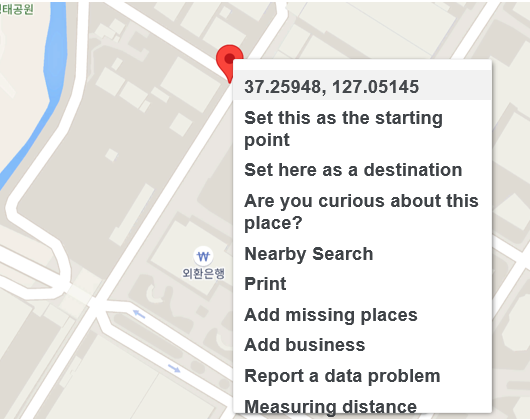

Create a map

In [160]:
import folium
map = folium.Map(width=600, height=400,location = [27.683181275414146, 85.31802024029065],
                zoom_start=15,
)
map

**Apply a style to a map**

> tamenterrain <br>
> stamentoner <br>
stamenwatercolor <br>
cartodbpositron <br>
cartodbdark matter <br>
openstreetmap



In [161]:
import folium
map = folium.Map(width=600, height=400,location = [27.683181275414146, 85.31802024029065],
                       zoom_start=15,
                       tiles = "stamenwatercolor",
)
map

How to display marker icons and information at specific locations

In [162]:
marker_map = folium.Map(height= 600, width= 400, location=[45.372,-121.6625], zoom_start = 12, tiles = "Stamen Terrain")

folium.Marker(
  location=[45.3288, -121.6625],
  popup= "Mt.Hood Meadows",
  icon=folium.Icon(icon="cloud"),
).add_to(marker_map)

folium.Marker(
  location=[45.3311,-121.7113],
  popup="Timberline Lodge" ,
  icon= folium.Icon(color="green"),
).add_to(marker_map)

folium.CircleMarker(
  location=[45.3800,-121.7113],
  radius=100,
  popup="circle",
  color="#3186cc",
  fill= True,
  fill_color= "#3186cc",
).add_to(marker_map)

marker_map


How to display a step-by-step diagram in the map area

In [163]:
import pandas as pd

# url = (
# "https://raw.github.com/python-visualization/folium/blob/main/examples/data/"
# )
# state_geo = f"{url}/us-states.json"
# state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"

state_geo = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json"
state_unemployment="https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

# Step 4
We can visualize the already processed data frame of the cumulative number of confirmed cases by 100 people in each country by applying the visualization method to the map learned in previous step.
• https://ourworldindata.org.covid-vaccination-global-projections

In [178]:
import folium
import json

center = [35.762887375145795, 84.08313219586536]

m = folium.Map(location=center, zoom_start=2,
    max_bounds = True,
    min_zoom =1, min_lat = -84,
    max_lat = 84, min_lon=-175, max_lon = 187,
  )

geo_path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.json"

json_data = json.load(open(geo_path),encoding='utf-8')

folium.Choropleth(geo_data = json_data,
  data= total_df,
  columns=(total_df.index,'total_vaccinations_per_hundred'),
  key_on = 'properties.COUNTRY',
  fill_color = 'RdYIGn' ,
  fill_opacity = 0.7,
  line_opacity = 0.5,
  ).add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
m

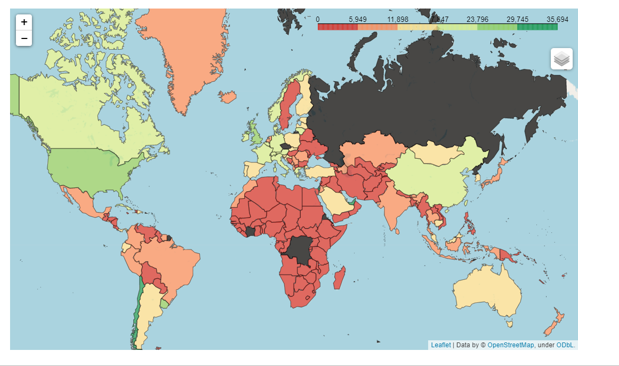

This is a visualization of the cumulative number of infected people by a group of 100 people from the time of
he corona outbreak based on the current time.